In [3]:
# Setup: detectar la raíz del proyecto y la carpeta interim
# Ejecuta esta celda antes de las demás (define `PROJECT_ROOT` y `interim`).
from pathlib import Path
import os

PROJECT_ROOT = Path.cwd()
search = PROJECT_ROOT
for _ in range(10):
    if (search / 'data').exists() or (search / '.git').exists() or (search / 'requirements.txt').exists():
        PROJECT_ROOT = search
        break
    if search == search.parent:
        break
    search = search.parent

if PROJECT_ROOT.name in ('notebooks', 'src'):
    PROJECT_ROOT = PROJECT_ROOT.parent

interim = PROJECT_ROOT / 'data' / 'interim'
print('PROJECT_ROOT:', PROJECT_ROOT)
print('interim:', interim)


PROJECT_ROOT: c:\Users\ortuo\tfgirati\tfg-nisar
interim: c:\Users\ortuo\tfgirati\tfg-nisar\data\interim


Dimensiones: (6220, 4545)
Rango: -36.83 a 34.00 dB
✅ Imagen guardada como 'c:\Users\ortuo\tfgirati\tfg-nisar\notebooks\nisar_image.png'
✅ Imagen guardada como 'c:\Users\ortuo\tfgirati\tfg-nisar\notebooks\nisar_image.png'


Dimensiones: (6220, 4545)
Rango: -36.83 a 34.00 dB
✅ Imagen guardada como 'c:\Users\ortuo\tfgirati\tfg-nisar\notebooks\nisar_image.png'
✅ Imagen guardada como 'c:\Users\ortuo\tfgirati\tfg-nisar\notebooks\nisar_image.png'


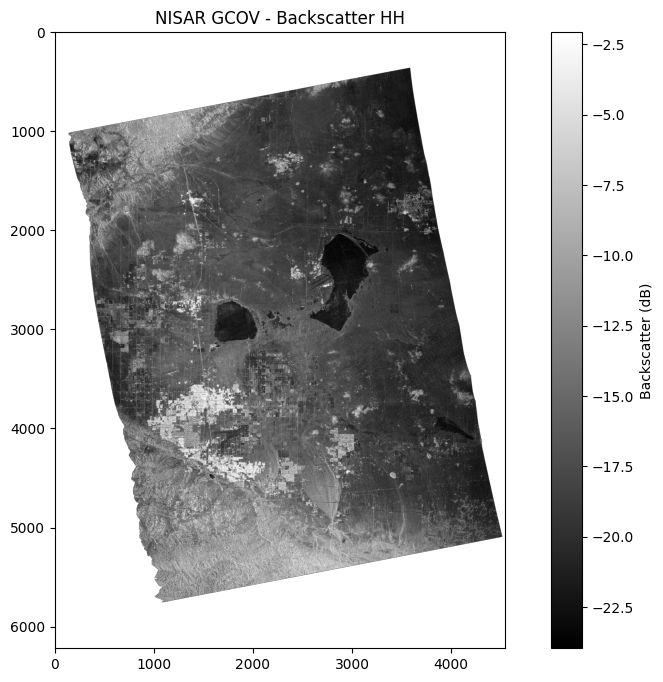

Usando carpeta: c:\Users\ortuo\tfgirati\tfg-nisar\data\interim


In [4]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Abrir el archivo TIFF principal
with rasterio.open('../data/interim/NISAR_L2_PR_GCOV_HHHH_dB.tif') as src:
    data = src.read(1)
    print(f"Dimensiones: {data.shape}")
    print(f"Rango: {np.nanmin(data):.2f} a {np.nanmax(data):.2f} dB")
    
    # Visualizar
    plt.figure(figsize=(12, 8))
    plt.imshow(data, cmap='gray', vmin=np.nanpercentile(data,1), vmax=np.nanpercentile(data,99))
    plt.colorbar(label='Backscatter (dB)')
    plt.title('NISAR GCOV - Backscatter HH')
    
    # Guardar la imagen
    out_img = PROJECT_ROOT / 'notebooks' / 'nisar_image.png'
    plt.savefig(out_img, dpi=150, bbox_inches='tight')
    print(f"✅ Imagen guardada como '{out_img}'")
    
    plt.show()

# Detectar raíz del proyecto buscando hacia arriba una carpeta con 'data', '.git' o 'requirements.txt'
PROJECT_ROOT = Path.cwd()
search = PROJECT_ROOT
found = False
for _ in range(10):
    if (search / 'data').exists() or (search / '.git').exists() or (search / 'requirements.txt').exists():
        PROJECT_ROOT = search
        found = True
        break
    if search == search.parent:
        break
    search = search.parent

if not found:
    # fallback: si estamos dentro de 'notebooks' o 'src', tomar el padre
    if PROJECT_ROOT.name in ('notebooks', 'src'):
        PROJECT_ROOT = PROJECT_ROOT.parent

interim = PROJECT_ROOT / 'data' / 'interim'
print('Usando carpeta:', interim)


In [5]:
def load_tif_like(pattern: str):
    files = sorted(interim.glob(pattern))
    if not files:
        print("No encontré", pattern, "en", interim)
        return None, None
    path = files[0]
    with rasterio.open(path) as src:
        arr = src.read(1)
    print("OK:", path.name, arr.shape, f"rango {np.nanmin(arr):.2f}..{np.nanmax(arr):.2f}")
    return arr, path


OK: NISAR_L2_PR_GCOV_numberOfLooks.tif (6220, 4545) rango 0.00..40.25


OK: NISAR_L2_PR_GCOV_numberOfLooks.tif (6220, 4545) rango 0.00..40.25


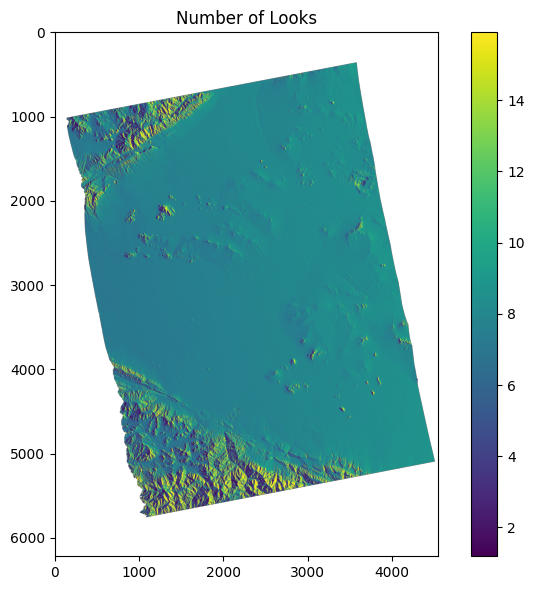

OK: NISAR_L2_PR_GCOV_numberOfLooks.tif (6220, 4545) rango 0.00..40.25


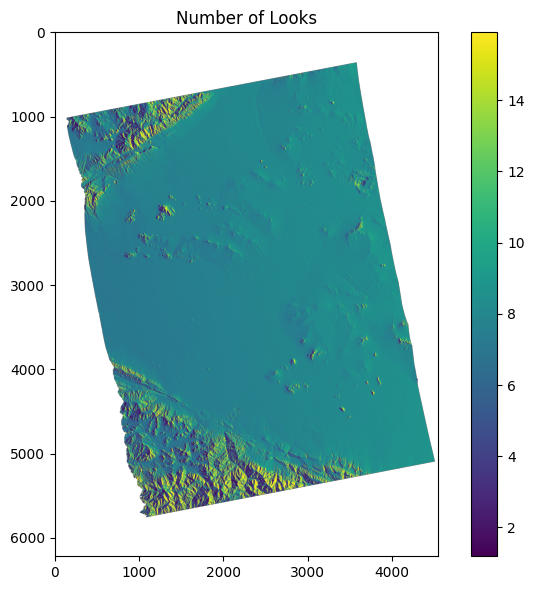

OK: NISAR_L2_PR_GCOV_HHHH_dB.tif (6220, 4545) rango -36.83..34.00
No encontré *HHHH_sigma0_dB.tif en c:\Users\ortuo\tfgirati\tfg-nisar\data\interim
No encontré *incidenceAngle*.tif en c:\Users\ortuo\tfgirati\tfg-nisar\data\interim
No encontré *HVHV_dB*.tif en c:\Users\ortuo\tfgirati\tfg-nisar\data\interim

GeoTIFFs en c:\Users\ortuo\tfgirati\tfg-nisar\data\interim
- NISAR_L2_PR_GCOV_HHHH_dB.tif 57644193
- NISAR_L2_PR_GCOV_numberOfLooks.tif 113117174
- NISAR_L2_PR_GCOV_rtcFactor.tif 113117174


In [6]:
# numberOfLooks
nlooks, _ = load_tif_like("*numberOfLooks*.tif")
if nlooks is not None:
    plt.figure(figsize=(7,6))
    plt.imshow(nlooks, vmin=np.nanpercentile(nlooks,1), vmax=np.nanpercentile(nlooks,99))
    plt.title("Number of Looks"); plt.colorbar(); plt.tight_layout(); plt.show()

# HH gamma0 (dB) y sigma0 (dB) si existe
hh_gamma_db, _ = load_tif_like("*HHHH_dB.tif")
hh_sigma_db, _ = load_tif_like("*HHHH_sigma0_dB.tif")
if (hh_gamma_db is not None) and (hh_sigma_db is not None):
    diff = hh_sigma_db - hh_gamma_db
    plt.figure(figsize=(7,6))
    v = np.nanpercentile(np.abs(diff), 99)
    plt.imshow(diff, vmin=-v, vmax=v); plt.title("σ⁰_dB − γ⁰_dB")
    plt.colorbar(); plt.tight_layout(); plt.show()

# Incidence angle (si lo exportaste)
inc, _ = load_tif_like("*incidenceAngle*.tif")
if inc is not None:
    plt.figure(figsize=(7,6))
    plt.imshow(inc, vmin=np.nanpercentile(inc,1), vmax=np.nanpercentile(inc,99))
    plt.title("Incidence angle (deg)"); plt.colorbar(); plt.tight_layout(); plt.show()

# HV y CPR (si existen)
hv_db, _ = load_tif_like("*HVHV_dB*.tif")
if (hh_gamma_db is not None) and (hv_db is not None):
    plt.figure(figsize=(7,6))
    plt.imshow(hv_db, vmin=np.nanpercentile(hv_db,1), vmax=np.nanpercentile(hv_db,99))
    plt.title("HV (dB)"); plt.colorbar(); plt.tight_layout(); plt.show()

    cpr, _ = load_tif_like("*CPR*.tif")
    if cpr is not None:
        plt.figure(figsize=(7,6))
        plt.imshow(cpr, vmin=np.nanpercentile(cpr,1), vmax=np.nanpercentile(cpr,99))
        plt.title("CPR = HV/HH"); plt.colorbar(); plt.tight_layout(); plt.show()
# ejecutar la celda nueva como script (usa el python del venv)
& "C:\Users\ortuo\tfgirati\.venv\Scripts\python.exe" - <<'PY'
from pathlib import Path
import rasterio, numpy as np, matplotlib.pyplot as plt
PROJECT_ROOT = Path(r'C:\Users\ortuo\tfgirati\tfg-nisar')
interim = PROJECT_ROOT / 'data' / 'interim'
out_dir = PROJECT_ROOT / 'notebooks' / 'figures'
out_dir.mkdir(parents=True, exist_ok=True)
for tif in sorted(interim.glob('*.tif')):
    try:
        with rasterio.open(tif) as src:
            arr = src.read(1)
    except Exception as e:
        print('No pude abrir', tif.name, '->', e); continue
    h,w = arr.shape
    maxdim = max(h,w)
    if maxdim > 2000:
        factor = max(1, maxdim // 1500)
        arr_ds = arr[::factor, ::factor]
    else:
        arr_ds = arr
    try:
        vmin = np.nanpercentile(arr_ds, 1); vmax = np.nanpercentile(arr_ds, 99)
    except Exception:
        vmin,vmax = np.nanmin(arr_ds), np.nanmax(arr_ds)
    fig=plt.figure(figsize=(8,6)); plt.imshow(arr_ds,cmap='gray',vmin=vmin,vmax=vmax); plt.title(tif.name); plt.colorbar(); plt.tight_layout()
    out_png = out_dir / (tif.stem + '.png')
    fig.savefig(out_png, dpi=150); plt.close(fig)
    print('Guardado', out_png)
print('Hecho. Comprueba la carpeta:', out_dir)
PY
# Nuevo: listar todos los GeoTIFFs en interim con tamaño
print('\nGeoTIFFs en', interim)
for f in sorted(interim.glob('*.tif')):
    try:
        size = f.stat().st_size
    except Exception:
        size = 'n/a'
    print('-', f.name, size)